<a href="https://colab.research.google.com/github/Siiqueira/Projetos_Python/blob/main/Projeto_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 03

Como exemplo de trabalho com alguns dados de **séries temporais**, vamos dar uma olhada nas contagens de bicicletas na **Fremont Bridge de Seattle**. Esses dados vêm de um contador de bicicletas automatizado, instalado no final de **2012**, que tem sensores indutivos nas calçadas leste e oeste da ponte.

Importando bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Carregando e extraindo Dataset com Pandas
usando a coluna 'Dates' como indice e convertendo as datas e horas em minutos e segundos

In [14]:
df = pd.read_csv("/content/sample_data/fremont-bridge.csv", index_col= 'Date', parse_dates= True)
df.head(5)

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


Mudando os nomes das colunas e criar a coluna "Total"

In [15]:
df.columns = ["west","east"]
df["total"] = df["west"] + df ["east"]
df.head()

,west,east,total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


Usando Dropna para elimiar NaN do dataset e usando o describe para fazer um sumario estatistico dos dados

In [16]:
df.dropna().describe()

,west,east,total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


Visualização dos dados brutos

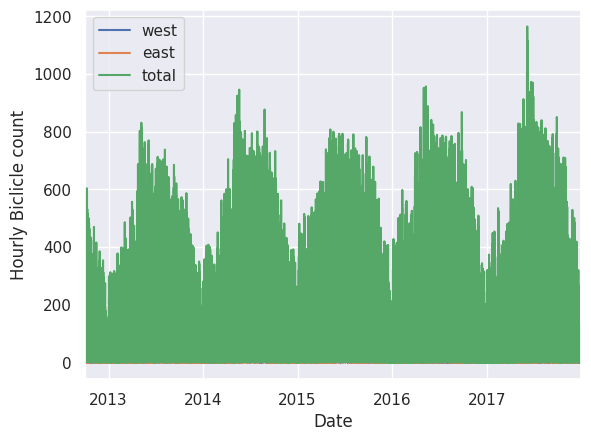

In [17]:
sns.set()
df.plot()
plt.ylabel("Hourly Biclicle count")
plt.show()

Visualização por semana para fazer mais sentido

Puxamos uma reamostragem com o resample e passamos como paramametro 'W' que representa semana

Mudança no estilo da linha para ter uma visualização melhor

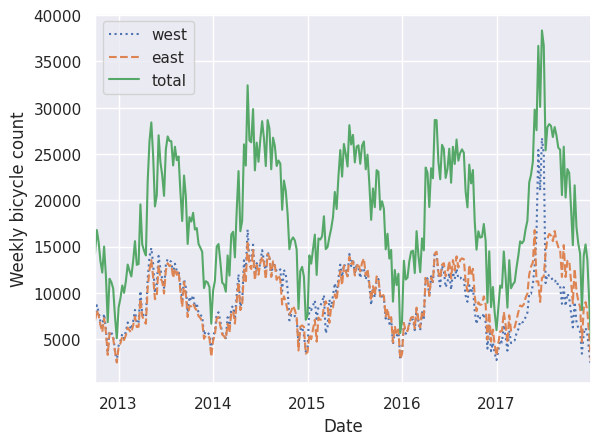

In [19]:
weekly = df.resample('w').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel("Weekly bicycle count")
plt.show()

Visualização por dia para fazer uma analise melhor

Puxamos uma reamostragem com o resample e passamos como paramametro 'D' que representa diaria

Aplicando média movel para agregar mais valor na analise

Usando .rolling

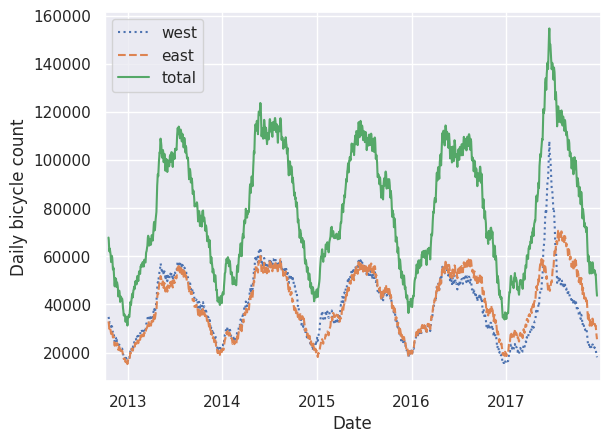

In [22]:
daily = df.resample('d').sum()
daily.rolling(30, center=True).sum().plot(style = [':','--','-'])
plt.ylabel("Daily bicycle count")
plt.show()

A irregularidade do resultado é devido ao corte rígido da janela. Podemos obter uma versão mais suave de uma média rolante usando uma função de janela — por exemplo, uma janela gaussiana.


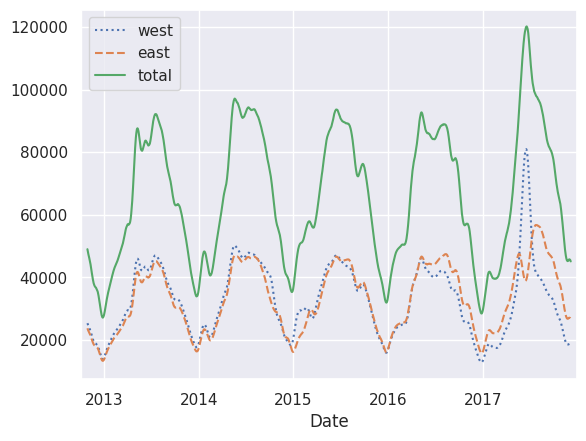

In [23]:

daily.rolling(50, center = True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])
plt.show()

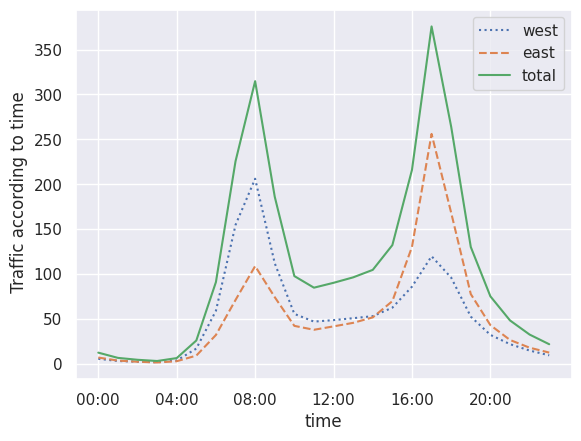

In [24]:
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':','--','-'])
plt.ylabel(" Traffic according to time")
plt.show()

**Analisando os dados que temos disponivel, podemos ver que teem uma tendencia para as pessoas alugarem mais as bicicletas no verão e os horarios preferidos são as 08:00 da manha e as ~17:00.**